## Análisis de datos de Encuesta Mundial de Salud Escolar

### Grupo 9
Integrantes:
- Cruz, Ruth
- Gabis Leccesi, Luciana
- Garnica, Rocío
- Gonzalez Navarro, Sol
- Palma, Malena Agustina
- Vidal, Teresa
- Stachoni, Yanina

**Dataset seleccionado:** 
- Resultados encuesta EMSE
- Origen de datos: https://datos.gob.ar/ar/dataset/salud-base-datos-3deg-encuesta-mundial-salud-escolar-emse-con-resultados-nacionales-argentina

La Encuesta Mundial de Salud Escolar (EMSE) utiliza una metodología estandarizada a nivel mundial para relevar datos sobre aspectos sociodemográficos e indaga sobre conductas relacionadas con el comportamiento alimentario, el consumo de alcohol y otras drogas, la violencia y daños no intencionados, la seguridad vial, la salud mental, el con- sumo de tabaco, la actividad física, los comportamientos sexuales y los factores de protección

**Objetivos:**
* La EMSE abarca muchas temáticas con más de 70 preguntas. Para nuestro estudio decidimos enforcarnos en temas de violencia y daños no intencionados, persiguiendo los siguientes objetivos:
* * Detectar patrones en niños y niñas que han sido víctimas de intimidación, considerando relaciones familiares y con amigos, datos físicos y sociodemográficos.
  * Detectar diferencias en los distintos tipos de intimidación (en escuela, fuera del ámbito escolar, vía internet).
  * Predecir victimas de intimidación escolar.
 



In [64]:
#Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


-------------
Para poder centrarnos en el análisis de los datos que nos resultan relevantes, primero analizamos todas las preguntas y seleccionamos aquellas con las que vamos a trabajar, pudiendo ampliar el análisis luego.

In [65]:
#Leer Excel creado con el analisis de las preguntas que son de interes
df_conf = pd.read_excel("Analisis Preguntas.xlsx")
print(f"Filas y columnas totales: {df_conf.shape}")
df_conf.head()

Filas y columnas totales: (75, 4)


,Id Pregunta,Pregunta,Relevante,Nombre Columna
0,texto_q1,Edad,Si,edad
1,texto_q2,Sexo,Si,sexo
2,texto_q3,Grado o Año,Si,grado
3,q4,Estatura,Si,altura
4,q5,Peso,Si,peso


In [66]:
#Armar configuracion de columnas a cargar del dataset
df_conf = df_conf[df_conf["Relevante"] == "Si"]
print(f"Cantidad de preguntas de interés para el análisis: {df_conf.shape[0]}")
columnas_a_leer = df_conf["Id Pregunta"].values
print(f"Columnas a leer: {columnas_a_leer}")
columnas_nombres = df_conf["Nombre Columna"].values
print(f"Título de las columnas: {columnas_nombres}")

Cantidad de preguntas de interés para el análisis: 43
Columnas a leer: ['texto_q1' 'texto_q2' 'texto_q3' 'q4' 'q5' 'texto_q6' 'texto_q16'
 'texto_q17' 'texto_q18' 'texto_q19' 'texto_q22' 'texto_q23' 'texto_q24'
 'texto_q26' 'texto_q27' 'texto_q28' 'texto_q29' 'texto_q33' 'texto_q34'
 'texto_q35' 'texto_q39' 'texto_q40' 'texto_q44' 'texto_q45' 'texto_q49'
 'texto_q51' 'texto_q53' 'texto_q54' 'texto_q55' 'texto_q56' 'texto_q57'
 'texto_q58' 'texto_q59' 'texto_q60' 'texto_q66' 'texto_q67' 'texto_q68'
 'texto_q76' 'texto_q80' 'texto_q81' 'texto_qnunwtg' 'texto_qnowtg'
 'texto_qnobeseg']
Título de las columnas: ['edad' 'sexo' 'grado' 'altura' 'peso' 'hambre' 'participar_pelea'
 'cantidad_lesiones' 'tipo_lesion' 'causa_lesion' 'sentir_soledad'
 'sentir_preocupacion' 'pensar_suicidio' 'intentar_suicidio'
 'amigos_cercanos' 'edad_cigarrillo' 'dias_fumar' 'padres_fuman'
 'edad_alcohol' 'dias_tomar_alcohol' 'problemas_alcohol' 'edad_drogas'
 'relaciones_sexuales' 'edad_relaciones_sexuales' 'dias

In [67]:
#Importar el dataset con las columanas preseleccionadas
df = pd.read_csv("EMSE_DatosAbiertos.csv", usecols=columnas_a_leer)
df.shape

(56981, 43)

In [68]:
#Asignar los nuevos nombres de columnas
df.columns = columnas_nombres
df.head()

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Primaria completa,Si,Si,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario incompleto,No,No,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Secundario completo,No,No,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Secundario incompleto,No,No,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Primaria incompleta,No,No,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido


## Análisis exploratorio de datos

In [69]:
#Ver cantidad de filas y columnas del DataFrame
filas, columnas = df.shape
print(f"El DataFrame tiene {format(filas,',').replace(',','.')} filas y {columnas} columnas")

El DataFrame tiene 56.981 filas y 43 columnas


In [70]:
#Analizar algunas filas del df
#Las primeras 10 filas
df.head(10)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
0,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Primaria completa,Si,Si,Dato perdido,Definitivamente sí,Dato perdido,Dato perdido,Dato perdido,Dato perdido,Dato perdido
1,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario incompleto,No,No,No,Probablemente no,Nunca,Algunas veces,Dato perdido,Dato perdido,Dato perdido
2,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,Ninguna,2 o 3 veces,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,Secundario completo,No,No,No,Definitivamente no,Nunca,Siempre,No,No,No
3,16 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2 o 3 veces,Ninguna,No tuve ninguna lesión seria o grave en los úl...,Dato perdido,...,Secundario incompleto,No,No,No,Definitivamente sí,Nunca,Siempre,No,No,No
4,13 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Nunca,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Primaria incompleta,No,No,No,Definitivamente no,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
5,13 años,Masculino,9no grado nivel Primario/Polimodal o 2do año n...,1.72,48.0,Nunca,1 vez,1 vez,Tuve un hueso roto o una articulación dislocada,Me caí,...,Terciario/Universitario incompleto,No,No,No,Probablemente no,Rara vez,Siempre,No,No,No
6,14 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,No,No,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
7,12 años,Femenino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,No,No,No,Definitivamente no,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
8,13 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Casi siempre,2 o 3 veces,2 o 3 veces,Me sucedió otra cosa,Me caí,...,Secundario completo,No,No,No,Probablemente sí,Algunas veces,Algunas veces,Dato perdido,Dato perdido,Dato perdido
9,14 años,Femenino,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,Rara vez,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,Si,No,No,Probablemente sí,Casi siempre,Algunas veces,Dato perdido,Dato perdido,Dato perdido


In [71]:
# 3 filas aleatoreas
df.sample(3)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
19695,14 años,Masculino,2do año/11vo grado nivel Polimodal o 4to año n...,NaN,NaN,Casi siempre,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario incompleto,No,No,No,Probablemente no,Nunca,Nunca,Dato perdido,Dato perdido,Dato perdido
43267,13 años,Femenino,8vo grado nivel Primario/Polimodal o 1er año ...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Dato perdido,Si,No,No,Definitivamente no,Casi siempre,Siempre,Dato perdido,Dato perdido,Dato perdido
43211,15 años,Masculino,3er año/12vo grado nivel Polimodal o 5to año n...,NaN,NaN,Nunca,Ninguna,2 o 3 veces,Me sucedió otra cosa,Otra cosa causó mi lesión,...,Terciario/Universitario completo,No,No,No,Probablemente sí,Casi siempre,Siempre,Dato perdido,Dato perdido,Dato perdido


In [72]:
# Las últimas 5 filas
df.tail(5)

,edad,sexo,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,madre_educacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet,amigos_alcohol,sentir_ridiculo,padres_expectativas_altas,bajo_peso,sobre_peso,obeso
56976,16 años,Masculino,3er año/12vo grado nivel Polimodal o 5to año n...,1.78,86.0,Casi siempre,4 o 5 veces,1 vez,"Recibí un corte, una punzada o puñalada","Fui atacado, agredido, abusado o estaba pelean...",...,Primaria completa,No,Si,No,Definitivamente sí,Casi siempre,Rara vez,No,Si,No
56977,16 años,Masculino,3er año/12vo grado nivel Polimodal o 5to año n...,NaN,NaN,Algunas veces,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario completo,No,No,No,Probablemente sí,Casi siempre,Algunas veces,Dato perdido,Dato perdido,Dato perdido
56978,16 años,Masculino,Dato perdido,NaN,NaN,Nunca,Ninguna,Ninguna,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,Secundario incompleto,No,No,No,Probablemente sí,Nunca,Siempre,Dato perdido,Dato perdido,Dato perdido
56979,16 años,Femenino,3er año/12vo grado nivel Polimodal o 5to año n...,NaN,NaN,Nunca,Ninguna,1 vez,Tuve un hueso roto o una articulación dislocada,Me caí,...,Secundario completo,No,Si,No,Probablemente no,Rara vez,Casi siempre,Dato perdido,Dato perdido,Dato perdido
56980,16 años,Femenino,3er año/12vo grado nivel Polimodal o 5to año n...,1.65,56.0,Rara vez,Ninguna,Dato perdido,Dato perdido,Dato perdido,...,Terciario/Universitario completo,No,Si,Si,Probablemente no,Casi siempre,Rara vez,No,No,No


In [73]:
#Ver tipo de datos y cantidad de no nulos en cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       56873 non-null  object 
 1   sexo                       56981 non-null  object 
 2   grado                      56981 non-null  object 
 3   altura                     36052 non-null  float64
 4   peso                       36052 non-null  float64
 5   hambre                     56981 non-null  object 
 6   participar_pelea           56981 non-null  object 
 7   cantidad_lesiones          56981 non-null  object 
 8   tipo_lesion                56981 non-null  object 
 9   causa_lesion               56981 non-null  object 
 10  sentir_soledad             56981 non-null  object 
 11  sentir_preocupacion        56981 non-null  object 
 12  pensar_suicidio            56981 non-null  object 
 13  intentar_suicidio          56981 non-null  obj

**_Se destaca que en la mayoría de las columnas categóricas aparenta no haber datos nulos. Evaluemos sus opciones para ver si alguna de ellas se corresponde con un valor nulo_**

In [74]:
print(f"Valores en grado: {df.grado.unique()}")
print(f"Valores en sexo: {df.sexo.unique()}")
for columna in df.iloc[:,5:].columns:
    print(f"Valores en {columna}: {df[columna].unique()}")

Valores en grado: ['9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 'Dato perdido'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
Valores en sexo: ['Femenino' 'Masculino' 'Dato perdido']
Valores en hambre: ['Rara vez' 'Nunca' 'Algunas veces' 'Casi siempre' 'Siempre'
 'Dato perdido']
Valores en participar_pelea: ['Ninguna' '2 o 3 veces' '1 vez' '4 o 5 veces' '8 o 9 veces'
 'Dato perdido' '6 o 7 veces' '12 o más veces' '10 u 11 veces']
Valores en cantidad_lesiones: ['Ninguna' '2 o 3 veces' 'Dato perdido' '1 vez' '4 o 5 veces'
 '10 u 11 veces' '8 o 9 veces' '6 o 7 veces' '12 o más veces']
Valores en tipo_lesion: ['No tuve ninguna lesión seria o grave en los últimos 12 meses'
 'Tuve un hueso roto o una articulación dislocada' 'Dato perdido'
 'Me sucedió otra cosa

> Vemos que los valores que no tienen información figuran como "Dato perdido", reemplazamos este valor por np.Nan para poder analizar nulos en conjunto y tratarlos según corresponda

In [75]:
df.replace("Dato perdido", np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       56873 non-null  object 
 1   sexo                       56445 non-null  object 
 2   grado                      55920 non-null  object 
 3   altura                     36052 non-null  float64
 4   peso                       36052 non-null  float64
 5   hambre                     56482 non-null  object 
 6   participar_pelea           56713 non-null  object 
 7   cantidad_lesiones          51559 non-null  object 
 8   tipo_lesion                52782 non-null  object 
 9   causa_lesion               51790 non-null  object 
 10  sentir_soledad             56615 non-null  object 
 11  sentir_preocupacion        56584 non-null  object 
 12  pensar_suicidio            55628 non-null  object 
 13  intentar_suicidio          56302 non-null  obj

>  Notamos que el dato "Edad" figura como `object` en lugar de algún tipo `numérico`. Analizamos sus valores para intentar transformarlo a número.

In [76]:
df.edad.unique()

array(['13 años', '14 años', '16 años', '12 años', '15 años',
       '11 años o menos', '17 años', nan, '18 años o más'], dtype=object)

- Con una expresión regular seleccionamos todos los caracteres entre la `a` y la `z`, incluimos la `ñ`, la `á` y espacios. 
- Reemplazamos todos esos caracteres por vacío `''`

In [77]:
#Reemplazo de caracteres por ''
df.edad.replace(r'[a-zñá ]', '', regex=True, inplace=True)
#Convertimos ahora la columna a numérica
df.edad = pd.to_numeric(df.edad)
df.edad

0        13.0
1        13.0
2        14.0
3        16.0
4        13.0
         ... 
56976    16.0
56977    16.0
56978    16.0
56979    16.0
56980    16.0
Name: edad, Length: 56981, dtype: float64

## Análisis de datos nulos y outliers 

In [78]:
#Generamos una tabla con valor y cantidad de nulos por columna, ordenado descendente desde mayor porcentaje
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
obeso,20929,36.73,object
sobre_peso,20929,36.73,object
altura,20929,36.73,float64
peso,20929,36.73,float64
bajo_peso,20929,36.73,object
cantidad_lesiones,5422,9.52,object
causa_lesion,5191,9.11,object
tipo_lesion,4199,7.37,object
edad_alcohol,3643,6.39,object
relaciones_sexuales,2989,5.25,object


In [79]:
#Analizamos datos estadísticos de las columnas numéricas con datos nulos
datos_numericos = df[["altura","peso","edad"]].describe().T
datos_numericos["moda"] = df[["altura","peso","edad"]].mode().T
datos_numericos.rename(columns={"mean":"media", "50%": "mediana"}, inplace=True)
datos_numericos

,count,media,std,min,25%,mediana,75%,max,moda
altura,36052.0,1.642857,0.096898,1.2,1.57,1.64,1.7,2.03,1.6
peso,36052.0,60.212193,14.723909,27.0,51.00,58.00,66.0,187.00,60.0
edad,56873.0,14.905403,1.358115,11.0,14.00,15.00,16.0,18.00,14.0


- Para `altura` y `edad` vemos que tienen una desviación estándar baja, por lo tanto los valores se ubican cerca de la media
- También notamos que los valores de media, mediana y moda son similares por lo que tendrían una distribución de frecuencias simétrica.
- Hacemos un gráfico para comprobarlo 

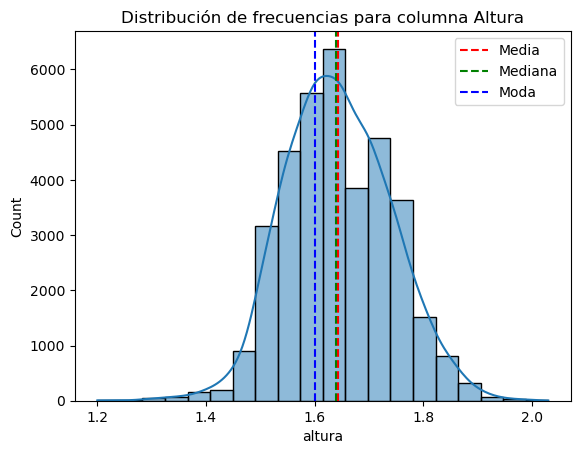

In [80]:
fig = sns.histplot(df, x="altura", kde=True, bins=20, kde_kws={"bw_adjust": 2} )
fig.axvline(datos_numericos.loc["altura"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["altura"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["altura"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Altura")
fig.legend()

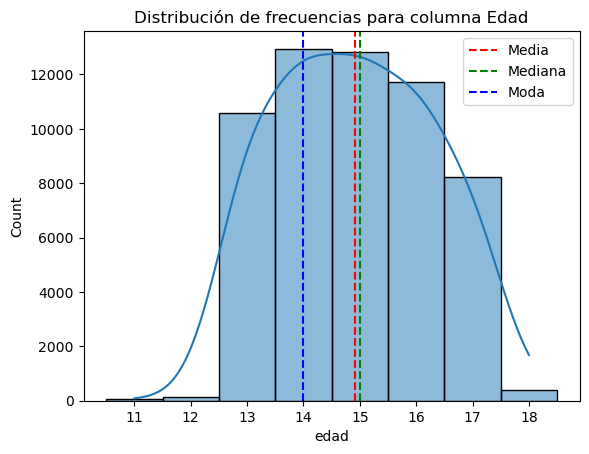

In [81]:
fig = sns.histplot(df, x="edad", discrete=True, kde=True, kde_kws={"bw_adjust": 4})
fig.axvline(datos_numericos.loc["edad"].media, color='r', linestyle='--', label="Media")
fig.axvline(datos_numericos.loc["edad"].mediana, color='g', linestyle='--', label="Mediana")
fig.axvline(datos_numericos.loc["edad"].moda, color='b', linestyle='--', label="Moda")
fig.set_title("Distribución de frecuencias para columna Edad")
fig.legend()

**_Para los dos casos, rellenamos nulos con el valor de la mediana_**

In [82]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
df.altura = imputer.fit_transform(df[['altura']])
df.edad = imputer.fit_transform(df[['edad']])
df[["altura","edad"]].describe()

,altura,edad
count,56981.000000,56981.000000
mean,1.641807,14.905583
std,0.077087,1.356834
min,1.200000,11.000000
25%,1.610000,14.000000
50%,1.640000,15.000000
75%,1.670000,16.000000
max,2.030000,18.000000


- Analizamos la dispersión y outliers para el caso de la columna `peso`. Ya que al tener una desviación estándar alta, los datos se asume que están dispersos. Con una media, moda y mediana cercanos pero con un sesgo a la derecha ya que la media (60.21) es mayor a la mediana (58)

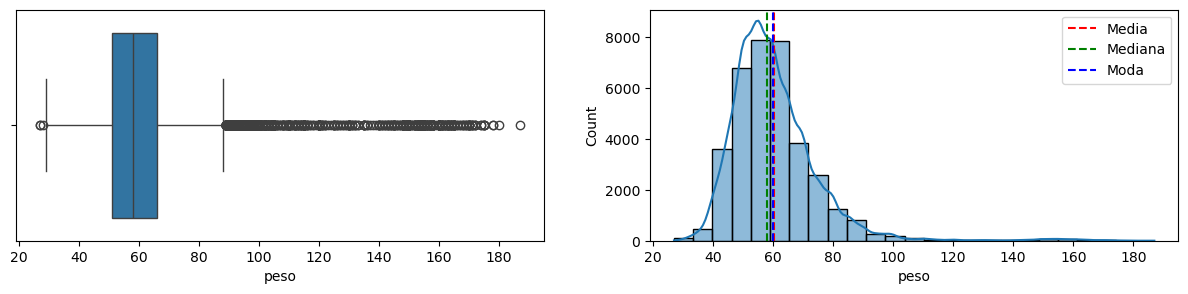

In [83]:
#Grafico de bigotes e histograma para evaluar la dispersión
f, (ax_box, ax_hist) = plt.subplots(1,2, figsize=(15, 3), sharex=False, sharey=False)

sns.boxplot(data=df, x="peso", ax=ax_box)

sns.histplot(data=df, x="peso", ax=ax_hist, bins=25, kde=True)

ax_hist.axvline(datos_numericos.loc["peso"].media, color='r', linestyle='--', label="Media")
ax_hist.axvline(datos_numericos.loc["peso"].mediana, color='g', linestyle='--', label="Mediana")
ax_hist.axvline(datos_numericos.loc["peso"].moda, color='b', linestyle='--', label="Moda")
ax_hist.legend()


plt.show()


Filas no nulas df original: 36052
Filas no nulas sin outliers: 34878
Filas removidas: 1174

Medidas estadísticas originales
count    36052.000000
mean        60.212193
std         14.723909
min         27.000000
25%         51.000000
50%         58.000000
75%         66.000000
max        187.000000
Name: peso, dtype: float64

Medidas estadísticas sin outliers
count    34878.000000
mean        58.526722
std         10.712567
min         29.000000
25%         50.000000
50%         57.000000
75%         65.000000
max         88.000000
Name: peso, dtype: float64



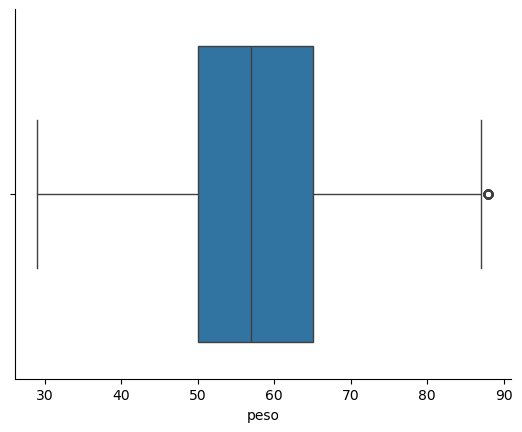

In [84]:
#Analizamos cuantos son los outliers y como cambia la descripción estadística de la columna sin ellos
q1, q3 = df["peso"].quantile([.25, .75])
ric = q3 - q1 #rango inter quartil
l_inf = q1 - 1.5 * ric
l_sup = q3 + 1.5 * ric
df_sin_outliers = df[df["peso"].between(l_inf, l_sup)]
print()
print(f"Filas no nulas df original: {df.peso.count()}")
print(f"Filas no nulas sin outliers: {df_sin_outliers.peso.count()}")
print(f"Filas removidas: {df.peso.count() - df_sin_outliers.peso.count()}")
print()
print("Medidas estadísticas originales")
print(df.peso.describe().T)
print()
print("Medidas estadísticas sin outliers")
print(df_sin_outliers.peso.describe().T)
print()
sns.boxplot(data=df_sin_outliers, x="peso")
sns.despine()

> Como el porcentaje de datos removidos es chico (2% --> 1174 filas en 56981 del total de filas), removemos los outliers y rellenamos nulos con la media

In [85]:
df = df_sin_outliers
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df.peso = imputer.fit_transform(df[['peso']])
df[["peso"]].describe()

,peso
count,34878.000000
mean,58.526722
std,10.712567
min,29.000000
25%,50.000000
50%,57.000000
75%,65.000000
max,88.000000


- Como `obeso`, `bajo_peso` y `sobre_peso` están calculados a partir de una fórmula que depende de la curva de crecimiento para cada sexo y edad (dato que no tenemos) y tienen alto porcentaje en datos nulos, eliminaremos esas columnas. Considerando, además, que tenemos el dato peso que esta directamente relacionado y es una variable que ya hemos podido solucionar.

In [86]:
df.drop(columns=["obeso", "bajo_peso","sobre_peso"], inplace=True)
df.columns

Index(['edad', 'sexo', 'grado', 'altura', 'peso', 'hambre', 'participar_pelea',
       'cantidad_lesiones', 'tipo_lesion', 'causa_lesion', 'sentir_soledad',
       'sentir_preocupacion', 'pensar_suicidio', 'intentar_suicidio',
       'amigos_cercanos', 'edad_cigarrillo', 'dias_fumar', 'padres_fuman',
       'edad_alcohol', 'dias_tomar_alcohol', 'problemas_alcohol',
       'edad_drogas', 'relaciones_sexuales', 'edad_relaciones_sexuales',
       'dias_act_fisica', 'dias_clase_ef', 'dias_falta_clases',
       'otros_amables', 'padres_tarea', 'padres_atencion',
       'padres_tiempo_libre', 'padres_revisar', 'padre_educacion',
       'madre_educacion', 'intimidacion_escuela', 'intimidacion_fuera',
       'intimidacion_internet', 'amigos_alcohol', 'sentir_ridiculo',
       'padres_expectativas_altas'],
      dtype='object')

In [87]:
# Analizar nulos con los cambios hechos hasta ahora
df_info_nulos = pd.DataFrame()
df_info_nulos['Cantidad'] = df.isnull().sum()
df_info_nulos['Porcentaje'] = (df.isnull().mean() * 100).round(2)
df_info_nulos['Tipo de dato'] = df[df_info_nulos.index].dtypes
df_info_nulos.sort_values(by="Porcentaje", ascending=False)

,Cantidad,Porcentaje,Tipo de dato
cantidad_lesiones,3245,9.30,object
causa_lesion,3152,9.04,object
tipo_lesion,2522,7.23,object
edad_alcohol,1961,5.62,object
relaciones_sexuales,1553,4.45,object
edad_drogas,1530,4.39,object
edad_relaciones_sexuales,1497,4.29,object
padres_expectativas_altas,1195,3.43,object
dias_tomar_alcohol,1186,3.40,object
padres_atencion,1134,3.25,object


**_Todos los datos faltantes se corresponden con columnas categóricas. Rellenaremos con el `más frecuente`_**

In [88]:
#Llenar los nulos con la opción más frecuente.
imputer_frequent = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [89]:
for columna in df_info_nulos[df_info_nulos["Porcentaje"] > 0].index:
    datos_imputados = imputer_frequent.fit_transform(df[[columna]])
    df[columna] =  datos_imputados[:,0]


In [90]:
#Chequear que no queden nulos
df.isnull().sum()

edad                         0
sexo                         0
grado                        0
altura                       0
peso                         0
hambre                       0
participar_pelea             0
cantidad_lesiones            0
tipo_lesion                  0
causa_lesion                 0
sentir_soledad               0
sentir_preocupacion          0
pensar_suicidio              0
intentar_suicidio            0
amigos_cercanos              0
edad_cigarrillo              0
dias_fumar                   0
padres_fuman                 0
edad_alcohol                 0
dias_tomar_alcohol           0
problemas_alcohol            0
edad_drogas                  0
relaciones_sexuales          0
edad_relaciones_sexuales     0
dias_act_fisica              0
dias_clase_ef                0
dias_falta_clases            0
otros_amables                0
padres_tarea                 0
padres_atencion              0
padres_tiempo_libre          0
padres_revisar               0
padre_ed

In [91]:
#Guardar nuevo csv con el DataFrame sin datos nulos
df.to_csv("EMSE_DatosAnalisisBullying.csv", index=False)

## Transformación de datos categóricos

In [92]:
#Cargar CSV anterior
df = pd.read_csv("EMSE_DatosAnalisisBullying.csv")

_Como primera medida transformaremos las columnas que solo tengan los valores "Si" y "No" por 1 y 0 respectivamente_

In [93]:
#Buscar las columnas que tengan sólo los valores "Si" y "No" 
columnas_booleanas = df.columns[df.isin(["No", "Si"]).all()].tolist()
columnas_booleanas

['pensar_suicidio',
 'relaciones_sexuales',
 'intimidacion_escuela',
 'intimidacion_fuera',
 'intimidacion_internet']

In [94]:
#Reemplazar los valores por su correspondiente numérico
df[columnas_booleanas] = df[columnas_booleanas].replace({"No":0, "Si":1})
print(df[columnas_booleanas].dtypes)
np.unique(df[columnas_booleanas].values)

pensar_suicidio          int64
relaciones_sexuales      int64
intimidacion_escuela     int64
intimidacion_fuera       int64
intimidacion_internet    int64
dtype: object


array([0, 1])

_Analizamos ahora las otras columnas de tipo object_

In [95]:
#Nombres de las columnas de tipo object
columnas_categoricas = df.select_dtypes(object).columns
columnas_categoricas

Index(['sexo', 'grado', 'hambre', 'participar_pelea', 'cantidad_lesiones',
       'tipo_lesion', 'causa_lesion', 'sentir_soledad', 'sentir_preocupacion',
       'intentar_suicidio', 'amigos_cercanos', 'edad_cigarrillo', 'dias_fumar',
       'padres_fuman', 'edad_alcohol', 'dias_tomar_alcohol',
       'problemas_alcohol', 'edad_drogas', 'edad_relaciones_sexuales',
       'dias_act_fisica', 'dias_clase_ef', 'dias_falta_clases',
       'otros_amables', 'padres_tarea', 'padres_atencion',
       'padres_tiempo_libre', 'padres_revisar', 'padre_educacion',
       'madre_educacion', 'amigos_alcohol', 'sentir_ridiculo',
       'padres_expectativas_altas'],
      dtype='object')

In [96]:
#Analizar valores que toman cada una de esas columnas
for col in columnas_categoricas:
    print(f'{col}: {df[col].unique()}')

sexo: ['Masculino' 'Femenino']
grado: ['2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 '9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
hambre: ['Nunca' 'Algunas veces' 'Rara vez' 'Siempre' 'Casi siempre']
participar_pelea: ['Ninguna' '2 o 3 veces' '1 vez' '4 o 5 veces' '6 o 7 veces' '8 o 9 veces'
 '12 o más veces' '10 u 11 veces']
cantidad_lesiones: ['2 o 3 veces' 'Ninguna' '1 vez' '10 u 11 veces' '4 o 5 veces'
 '6 o 7 veces' '12 o más veces' '8 o 9 veces']
tipo_lesion: ['Tuve un hueso roto o una articulación dislocada'
 'No tuve ninguna lesión seria o grave en los últimos 12 meses'
 'Me sucedió otra cosa'
 'Sufrí un golpe u otra lesión en la cabeza o el cuello, me desmayé o no podía respirar'
 'Recibí un corte, una punzada o puñalada' 'Sufrí una quemadura gra

### Notamos que hay diferentes casos a analizar:
#### 1- Columnas con valores ['Algunas veces' 'Casi siempre' 'Rara vez' 'Siempre' 'Nunca'] 
- En este caso las categorias se corresponden con un nivel, por lo que se reemplazará por valores crecientes en orden desde `Nunca` a `Siempre`
#### 2- Columnas con catidades:
_Columnas como aquellas que empiezan por `dias_*`, `edad_*` y algunas otras como `participar_pelea`, `amigos_cercanos`, etc que su respuesta es un numero y el texto "veces" o "días", etc._
- En este caso reemplazaremos por el valor del primer entero que se detecte y `ninguno`, `nunca`, etc serán `0`
#### 3- Columnas con categorías
_Son columnas que tienen diferentes valores que no representan una escala o número en específico_
- Para estos casos se usará `LabelEncoder` o `get_dummies` según veamos conveniente

In [97]:
### Columnas caso 1
columnas_caso_1 = df.columns[df.isin(['Nunca','Algunas veces','Rara vez','Siempre','Casi siempre']).all()].tolist()
columnas_caso_1

['hambre',
 'sentir_soledad',
 'sentir_preocupacion',
 'otros_amables',
 'padres_tarea',
 'padres_atencion',
 'padres_tiempo_libre',
 'padres_revisar',
 'sentir_ridiculo',
 'padres_expectativas_altas']

In [98]:
valores = {
    'Nunca': 0
    ,'Rara vez': 1
    ,'Algunas veces': 2
    ,'Casi siempre': 3
    ,'Siempre': 4
}
nuevas_columnas = [col + '_val' for col in columnas_caso_1]
df[nuevas_columnas] = df[columnas_caso_1].replace(valores)
df[nuevas_columnas + columnas_caso_1]

,hambre_val,sentir_soledad_val,sentir_preocupacion_val,otros_amables_val,padres_tarea_val,padres_atencion_val,padres_tiempo_libre_val,padres_revisar_val,sentir_ridiculo_val,padres_expectativas_altas_val,hambre,sentir_soledad,sentir_preocupacion,otros_amables,padres_tarea,padres_atencion,padres_tiempo_libre,padres_revisar,sentir_ridiculo,padres_expectativas_altas
0,0,0,1,2,4,4,4,0,0,4,Nunca,Nunca,Rara vez,Algunas veces,Siempre,Siempre,Siempre,Nunca,Nunca,Siempre
1,0,0,2,2,0,4,4,0,0,4,Nunca,Nunca,Algunas veces,Algunas veces,Nunca,Siempre,Siempre,Nunca,Nunca,Siempre
2,0,0,1,3,4,4,4,0,1,4,Nunca,Nunca,Rara vez,Casi siempre,Siempre,Siempre,Siempre,Nunca,Rara vez,Siempre
3,0,0,3,3,4,4,0,2,0,2,Nunca,Nunca,Casi siempre,Casi siempre,Siempre,Siempre,Nunca,Algunas veces,Nunca,Algunas veces
4,0,1,1,3,2,4,0,1,1,1,Nunca,Rara vez,Rara vez,Casi siempre,Algunas veces,Siempre,Nunca,Rara vez,Rara vez,Rara vez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34873,0,1,1,1,2,3,3,0,1,0,Nunca,Rara vez,Rara vez,Rara vez,Algunas veces,Casi siempre,Casi siempre,Nunca,Rara vez,Nunca
34874,3,0,0,2,4,4,2,1,0,4,Casi siempre,Nunca,Nunca,Algunas veces,Siempre,Siempre,Algunas veces,Rara vez,Nunca,Siempre
34875,0,1,1,3,1,2,0,3,2,3,Nunca,Rara vez,Rara vez,Casi siempre,Rara vez,Algunas veces,Nunca,Casi siempre,Algunas veces,Casi siempre
34876,3,2,3,2,3,2,2,1,3,1,Casi siempre,Algunas veces,Casi siempre,Algunas veces,Casi siempre,Algunas veces,Algunas veces,Rara vez,Casi siempre,Rara vez


In [99]:
### Columnas caso 2
# Seleccionar las columnas que su nombre comience con "dias", "edad" o "cantidad"
columnas_cantidad = [col for col in df.columns if col.startswith(("dias_","edad_", "cantidad_"))]
# Agregar otras columnas que también tienen valores que pueden convertirse a numéricos
columnas_cantidad.extend(["participar_pelea", "intentar_suicidio", "amigos_cercanos","problemas_alcohol"])
# Ver todos los valores
np.unique(df[columnas_cantidad].values)

array(['0', '0 días', '0 veces', '1', '1 día', '1 o 2 días',
       '1 o 2 veces', '1 vez', '10 a 19 días', '10 días o más',
       '10 o 11 años', '10 o más veces', '10 u 11 años', '10 u 11 veces',
       '11 años o menos', '12 años', '12 o 13 años', '12 o más veces',
       '13 años', '14 años', '14 o 15 años', '15 años', '16 o 17 años',
       '18 años o más', '2', '2 días', '2 o 3 veces', '20 a 29 días',
       '3 a 5 días', '3 a 9 veces', '3 días', '3 o más', '4 días',
       '4 o 5 veces', '5 días', '5 días o más', '6 a 9 días', '6 días',
       '6 o 7 veces', '6 o más veces', '7 años de edad o menos',
       '7 años o menos', '7 días', '8 o 9 años', '8 o 9 veces',
       'Los 30 días', 'Ninguna', 'Nunca probé cigarrillos',
       'Nunca tomé alcohol más que unos pocos sorbos',
       'Nunca tuve relaciones sexuales', 'Nunca usé Drogas'], dtype=object)

In [100]:
# Reemplazar todos los valores que tengan "Nunca" por 0.
df[columnas_cantidad] = df[columnas_cantidad].replace(r'(^Nunca.*$)', 0, regex=True) #  Expresión regular "empieza por Nunca"
# Reemplazar "Ninguna" por 0 y "Los 30 días" por 30
df[columnas_cantidad] = df[columnas_cantidad].replace({"Ninguna": 0, "Los 30 días": 30})
# Reemplazar los valores restantes por el primer texto antes del espacio
for col in columnas_cantidad:
    df[col] = df[col].astype(str).apply(lambda x: x.split()[0])
# Verificar los nuevos valores
np.unique(df[columnas_cantidad].values)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '18', '2',
       '20', '3', '30', '4', '5', '6', '7', '8'], dtype=object)

In [101]:
#Convertir esas columnas a número entero
df[columnas_cantidad] = df[columnas_cantidad].astype(int)
df.dtypes

edad                             float64
sexo                              object
grado                             object
altura                           float64
peso                             float64
hambre                            object
participar_pelea                   int64
cantidad_lesiones                  int64
tipo_lesion                       object
causa_lesion                      object
sentir_soledad                    object
sentir_preocupacion               object
pensar_suicidio                    int64
intentar_suicidio                  int64
amigos_cercanos                    int64
edad_cigarrillo                    int64
dias_fumar                         int64
padres_fuman                      object
edad_alcohol                       int64
dias_tomar_alcohol                 int64
problemas_alcohol                  int64
edad_drogas                        int64
relaciones_sexuales                int64
edad_relaciones_sexuales           int64
dias_act_fisica 

In [102]:
### Columnas caso 3
# Valores de todas las columnas categoricas menos las del caso 1 (que tienen nueva columna numerica)
columnas_categoricas = df.select_dtypes(object).columns
columnas_categoricas = [col for col in columnas_categoricas if col not in columnas_caso_1]
columnas_categoricas

['sexo',
 'grado',
 'tipo_lesion',
 'causa_lesion',
 'padres_fuman',
 'padre_educacion',
 'madre_educacion',
 'amigos_alcohol']

In [103]:
#Analizar valores que toman cada una de esas columnas
for col in columnas_categoricas:
    print(f'{col}: {df[col].unique()}')

sexo: ['Masculino' 'Femenino']
grado: ['2do año/11vo grado nivel Polimodal o 4to año nivel Secundario'
 '9no grado nivel Primario/Polimodal o 2do año nivel Secundario'
 '1er año/10mo grado nivel Polimodal o 3er año nivel Secundario'
 '3er año/12vo grado nivel Polimodal o 5to año nivel Secundario'
 '8vo grado nivel Primario/Polimodal  o 1er año nivel Secundario']
tipo_lesion: ['Tuve un hueso roto o una articulación dislocada'
 'No tuve ninguna lesión seria o grave en los últimos 12 meses'
 'Me sucedió otra cosa'
 'Sufrí un golpe u otra lesión en la cabeza o el cuello, me desmayé o no podía respirar'
 'Recibí un corte, una punzada o puñalada' 'Sufrí una quemadura grave'
 'Recibí una herida con arma de fuego'
 'Perdí todo o parte de un pie, pierna, mano o brazo']
causa_lesion: ['Otra cosa causó mi lesión'
 'No sufrí ninguna lesión seria o grave durante los últimos 12 meses'
 'Me caí' 'Algo me cayó encima o me golpeó'
 'Fui atacado, agredido, abusado o estaba peleando con alguien'
 'Tuve u

Para la columna `sexo` usaremos get_dummies, ya que al ser solo dos categorias que van a ser muy utilizadas nos parece la mejor opción

In [104]:
#Usamos join para conservar la columna sexo original y agregar las nuevas por categoría
df = df[['sexo']].join(pd.get_dummies(df, columns=["sexo"]))
df.head()

,sexo,edad,grado,altura,peso,hambre,participar_pelea,cantidad_lesiones,tipo_lesion,causa_lesion,...,sentir_preocupacion_val,otros_amables_val,padres_tarea_val,padres_atencion_val,padres_tiempo_libre_val,padres_revisar_val,sentir_ridiculo_val,padres_expectativas_altas_val,sexo_Femenino,sexo_Masculino
0,Masculino,14.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,Nunca,0,2,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,...,1,2,4,4,4,0,0,4,False,True
1,Masculino,16.0,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,Nunca,2,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,2,2,0,4,4,0,0,4,False,True
2,Masculino,13.0,9no grado nivel Primario/Polimodal o 2do año n...,1.72,48.0,Nunca,1,1,Tuve un hueso roto o una articulación dislocada,Me caí,...,1,3,4,4,4,0,1,4,False,True
3,Masculino,15.0,9no grado nivel Primario/Polimodal o 2do año n...,1.64,45.0,Nunca,1,1,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,3,3,4,4,0,2,0,2,False,True
4,Femenino,14.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.50,40.0,Nunca,0,0,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,...,1,3,2,4,0,1,1,1,True,False


Para el resto de columnas usaremos `LabelEncoder`

In [105]:
encoder = LabelEncoder()

In [106]:
#Quitar la columna "sexo" de las columnas que nos quedan por tratar
columnas_categoricas.remove("sexo")

In [107]:
for col in columnas_categoricas:
    df[col+"_val"] = encoder.fit_transform(df[col])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34878 entries, 0 to 34877
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sexo                           34878 non-null  object 
 1   edad                           34878 non-null  float64
 2   grado                          34878 non-null  object 
 3   altura                         34878 non-null  float64
 4   peso                           34878 non-null  float64
 5   hambre                         34878 non-null  object 
 6   participar_pelea               34878 non-null  int64  
 7   cantidad_lesiones              34878 non-null  int64  
 8   tipo_lesion                    34878 non-null  object 
 9   causa_lesion                   34878 non-null  object 
 10  sentir_soledad                 34878 non-null  object 
 11  sentir_preocupacion            34878 non-null  object 
 12  pensar_suicidio                34878 non-null 

In [109]:
#Ver algunas filas del dataframe con las nuevas columnas
columnas_tratadas = [col + "_val" for col in columnas_categoricas]
df[columnas_categoricas + columnas_tratadas].sample(5)

,grado,tipo_lesion,causa_lesion,padres_fuman,padre_educacion,madre_educacion,amigos_alcohol,grado_val,tipo_lesion_val,causa_lesion_val,padres_fuman_val,padre_educacion_val,madre_educacion_val,amigos_alcohol_val
31953,3er año/12vo grado nivel Polimodal o 5to año n...,Tuve un hueso roto o una articulación dislocada,Otra cosa causó mi lesión,Mi madre o mi cuidadora,No sé,No sé,Definitivamente sí,2,7,6,1,0,0,1
3425,2do año/11vo grado nivel Polimodal o 4to año n...,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,Ninguno,Secundario completo,Secundario incompleto,Definitivamente no,1,1,5,3,3,4,0
25975,9no grado nivel Primario/Polimodal o 2do año n...,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,Ambos,Secundario completo,Secundario completo,Probablemente sí,4,1,5,0,3,3,3
17298,3er año/12vo grado nivel Polimodal o 5to año n...,No tuve ninguna lesión seria o grave en los úl...,No sufrí ninguna lesión seria o grave durante ...,Mi padre o mi cuidador,Secundario completo,Secundario completo,Probablemente sí,2,1,5,2,3,3,3
24962,2do año/11vo grado nivel Polimodal o 4to año n...,Me sucedió otra cosa,"Fui atacado, agredido, abusado o estaba pelean...",Ambos,Secundario completo,Secundario incompleto,Probablemente sí,1,0,2,0,3,4,3


In [110]:
#Guardar csv con columnas listas
df.to_csv("EMSE_DatosTransformados.csv", index=False)

## Gráficos

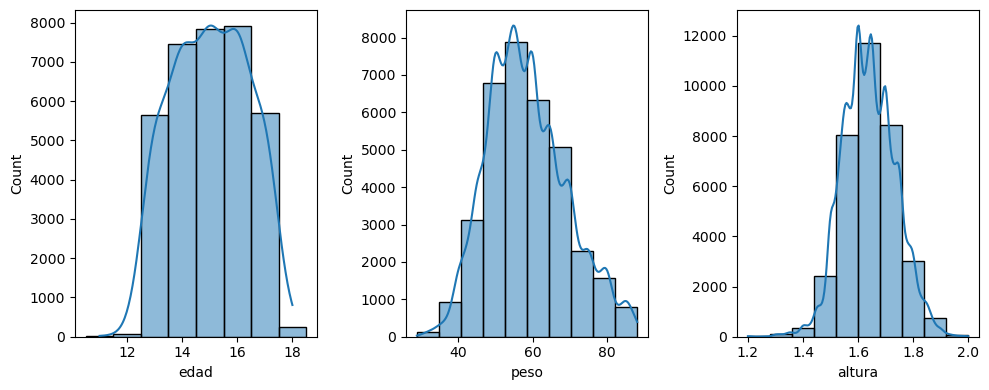

In [111]:
#Gráfico de densidad de las columnas numéricas
fig, ax = plt.subplots(1,3, figsize=(10, 4))
sns.histplot(df.edad, discrete=True, kde=True, kde_kws={"bw_adjust": 3},  ax=ax[0])
sns.histplot(df.peso, bins = 10,kde=True, ax=ax[1])
sns.histplot(df.altura, bins = 10,kde=True, ax=ax[2])
fig.tight_layout()

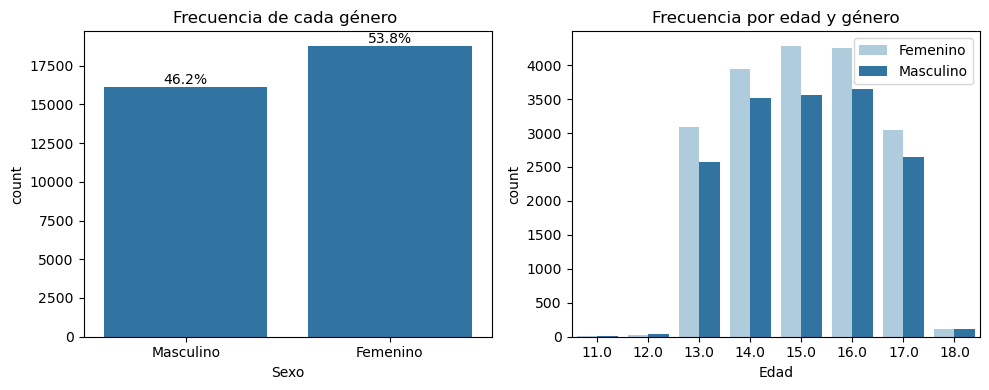

In [112]:
#Frecuencia por edad y sexo
fig, axes = plt.subplots(1,2, figsize=(10, 4))

# Trazar el primer gráfico en el primer eje
total = df['sexo'].count()
sns.countplot(data=df, x="sexo", ax=axes[0])
axes[0].bar_label(axes[0].containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
axes[0].set_xlabel('Sexo')
axes[0].set_title('Frecuencia de cada género ')

# Trazar el segundo gráfico en el segundo eje
sns.countplot(data=df, x="edad", hue="sexo", palette="Paired",  ax=axes[1])
axes[1].set_xlabel('Edad')
axes[1].set_title('Frecuencia por edad y género')
axes[1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()


> Se aprecia que la distribución por sexo en cada edad se mantiene, siendo ligeramente mayor la proporción de feminino que de masculino

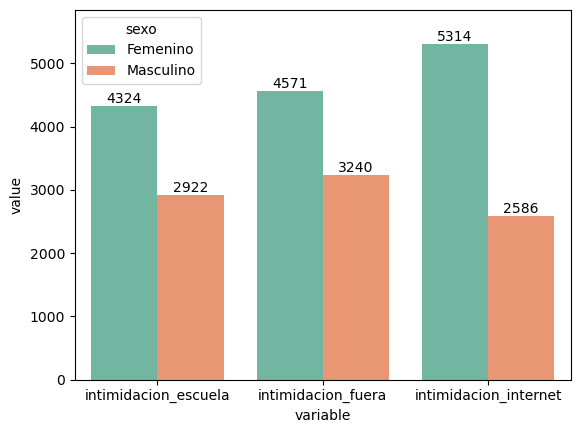

In [113]:
#Intimidación por tipo y sexo
df_intimidacion = df[["sexo","intimidacion_escuela","intimidacion_fuera","intimidacion_internet"]].groupby(["sexo",]).sum().reset_index()
ax = sns.barplot(data=df_intimidacion.melt(id_vars=['sexo']), x="variable", y="value", hue="sexo", palette="Set2")
for container in ax.containers:
    ax.bar_label(container)
    ax.margins(y=0.1)


> Se aprecia que para la categoría `intimidación por internet` (cyberacoso) se detecta tanto el **mayor** número de casos para el sexo `femenino` como el **menor** para `masculino`. En todos los casos de `intimidación` son más casos femeninos que masculinos. El **67,2%** de los casos son de sexo feminino

> Para el caso de nuestro mayor interés `intimidación escolar` se observa que del total de individuos que sufrieron intimidación, el **59,6%** fue **femenino** y el 40,4% restante, masculino.

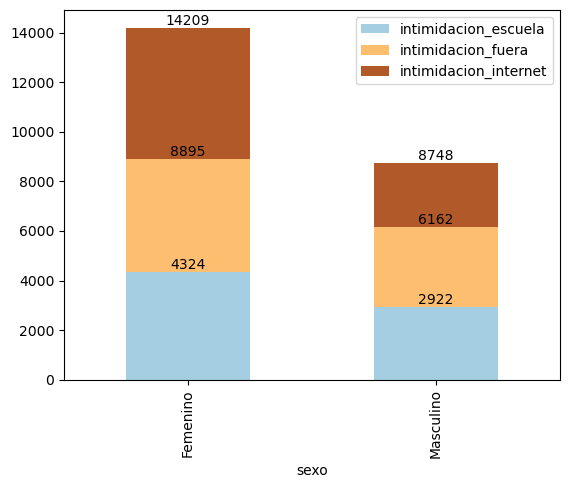

In [118]:
ax = df_intimidacion.set_index("sexo").plot(kind="bar", stacked=True, colormap='Paired')
#Agregar el dato numérico a cada barra
for container in ax.containers:
    ax.bar_label(container)

> Esta es otra manera de ver la diferencia entre casos para cada sexo. Se puede ver como son más los casos de intimidación en niñas. También vemos que en niñas `internet` es la forma de intimidación más usada y en niños la distribución es más pareja, pero la mayor es `fuera del ámbito escolar`

> Podemos ver que del total de encuestados (34878), el **65,82%** dijo haber sido victima de intimidación.

> De las víctimas, el **61,9%** son femininas 

In [123]:
# Calcular cuantas niñas y niños tuvieron algún tipo de intimidación.
# Para eso generamos una condición donde alguno de los tipos de intimidación sea 1
condicion = ((df["intimidacion_escuela"] == 1) | (df["intimidacion_fuera"] == 1) | (df["intimidacion_internet"] == 1))
# Agregar la columna "intimidación" como booleano para indicar si ese individuo sufrió intimidación sin importar el lugar
df["intimidacion"] = np.where(condicion, 1, 0)
# Comprobar resultados
df[["sexo","edad","intimidacion","intimidacion_escuela","intimidacion_fuera","intimidacion_internet"]]

,sexo,edad,intimidacion,intimidacion_escuela,intimidacion_fuera,intimidacion_internet
0,Masculino,14.0,0,0,0,0
1,Masculino,16.0,0,0,0,0
2,Masculino,13.0,0,0,0,0
3,Masculino,15.0,0,0,0,0
4,Femenino,14.0,0,0,0,0
...,...,...,...,...,...,...
34873,Masculino,16.0,1,0,1,0
34874,Masculino,16.0,0,0,0,0
34875,Masculino,15.0,1,0,0,1
34876,Masculino,16.0,1,0,1,0


In [142]:
# Ver la distribución por edad y sexo de individuos que sufrieron al menos un tipo de intimidación
# Agregar tres columnas 
# Columna "casos" para el total de casos de intimidación (al ser 1 y 0, su suma será la cantidad de 'unos') por edad y sexo"
# Columna "total" para calcular el total de invidividuos por edad y sexo
# Columna "porcentaje" para calcular el porcentaje de casos segun el total de individuos por edad y sexo
df_casos = df.groupby(["sexo","edad"])['intimidacion'].agg(casos='sum', total='count', porcentaje='mean').reset_index()
df_casos["edad"] = df_casos["edad"].astype(int)
df_casos

,sexo,edad,casos,total,porcentaje
0,Femenino,11,4,7,0.571429
1,Femenino,12,15,32,0.468750
2,Femenino,13,1339,3082,0.434458
3,Femenino,14,1809,3946,0.458439
4,Femenino,15,2024,4283,0.472566
5,Femenino,16,1966,4259,0.461611
6,Femenino,17,1408,3045,0.462397
7,Femenino,18,50,118,0.423729
8,Masculino,11,6,9,0.666667
9,Masculino,12,12,34,0.352941


> Podemos observar que alrededor del **46%** de las encuestadas **femeninas** tuvieron algún tipo de intimidación y en **masculinos** ese porcentaje desciende a alrededor del **35%**.

> Para ambos sexos se detecta que más de la mitad de los encuestados de 11 años sufrió intimidación. Es posible que se trate de chicos que han sido adelantados de grado ya que la encuesta se realizó sobre colegios secundarios, donde la edad "mínima" para primer año es de 12 años.

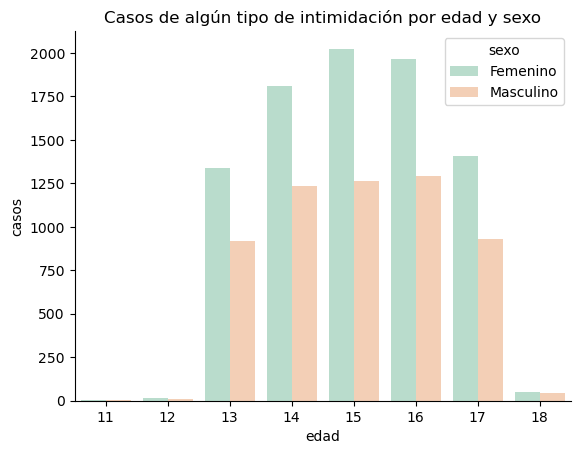

In [127]:
sns.barplot(data=df_casos, x="edad", y="casos", hue="sexo", palette="Pastel2")
plt.title("Casos de algún tipo de intimidación por edad y sexo")
sns.despine()

,sexo,casos,total,porcentaje
0,Femenino,8615,18772,45.89
1,Masculino,5695,16106,35.36


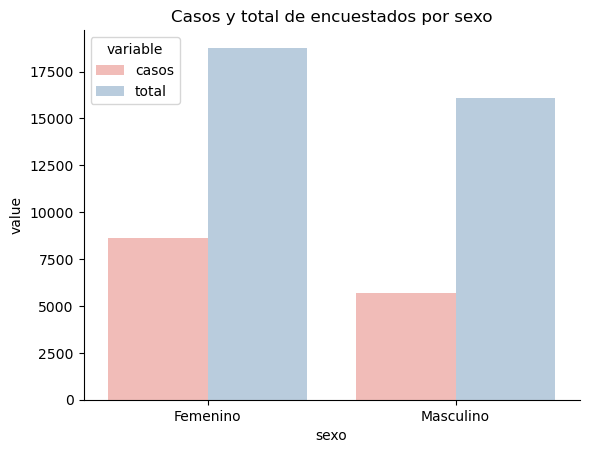

In [76]:
# Graficar el total de individuos y el total de individuos que sufrieron intimidación por sexo
df_casos_sexo = df_casos[["sexo","casos","total"]].groupby("sexo").sum().reset_index()
ax = sns.barplot(data=df_casos_sexo.melt(id_vars=["sexo"]), x='sexo', y='value', hue='variable', palette="Pastel1")
plt.title("Casos y total de encuestados por sexo")
sns.despine()
# Calcular el porcentaje de casos de intimidación sobre total de encuestados por sexo
df_casos_sexo["porcentaje"] = round(df_casos_sexo["casos"]/df_casos_sexo["total"]*100,2)
df_casos_sexo

> Aquí podemos apreciar que 45,89% del total `femenino` de los encuestados tuvo algún tipo de intimidación mientras del total `masculino`, solo el 35,36%

In [77]:
#Cruzar los casos de alguna intimidacion con sentirse solo
#Analizar los valores de "sentir_soledad"
df.sentir_soledad.unique()

array(['Nunca', 'Rara vez', 'Casi siempre', 'Siempre', 'Algunas veces'],
      dtype=object)

In [158]:
#Agrupar 'Nunca' y 'Rara vez' como No y el resto como Si
condicion_soledad = (df["sentir_soledad"].isin(['Nunca', 'Rara vez']))
df["soledad"] = np.where(condicion_soledad, 'No','Si')
df[["intimidacion","sentir_soledad","soledad"]].sample(15)

,intimidacion,sentir_soledad,soledad
30173,1,Rara vez,No
2745,0,Rara vez,No
7388,1,Algunas veces,Si
10790,1,Algunas veces,Si
33271,0,Rara vez,No
31638,0,Algunas veces,Si
18852,1,Casi siempre,Si
26962,0,Rara vez,No
26893,1,Rara vez,No
5595,0,Nunca,No


soledad,No,Si
intimidacion,,
No,13756,6812
Si,6136,8174


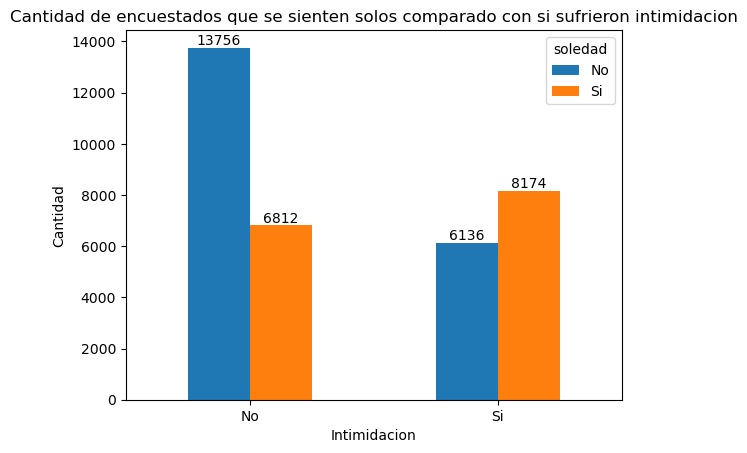

In [160]:
cross_tab = pd.crosstab(df['intimidacion'].replace({1:"Si",0:"No"}), df['soledad'])

fig = cross_tab.plot(kind='bar')
fig.set_xlabel('Intimidacion')
fig.set_ylabel('Cantidad')
plt.title("Cantidad de encuestados que se sienten solos comparado con si sufrieron intimidacion")
plt.xticks(rotation=0)

for bars in fig.containers:
    fig.bar_label(bars)

cross_tab

> Comprobamos que en la mayoría de los casos en que no fueron intimidados tampoco se sienten solos, mientras que para los que si fueron intimidados se sienten solos.

> Del total de encuestados que **sufrió intimidación**, el **57,12%** sintió soledad a veces, siempre o casi siempre. Mientras que, si se observa elconjunto de encuestados que **no sufrio intimidacion**, este porcentaje disminuye a **33,12%**.

,soledad,variable,value
0,No,intimidacion_escuela,2919
1,No,intimidacion_fuera,3174
2,No,intimidacion_internet,3076
3,Si,intimidacion_escuela,4327
4,Si,intimidacion_fuera,4637
5,Si,intimidacion_internet,4824


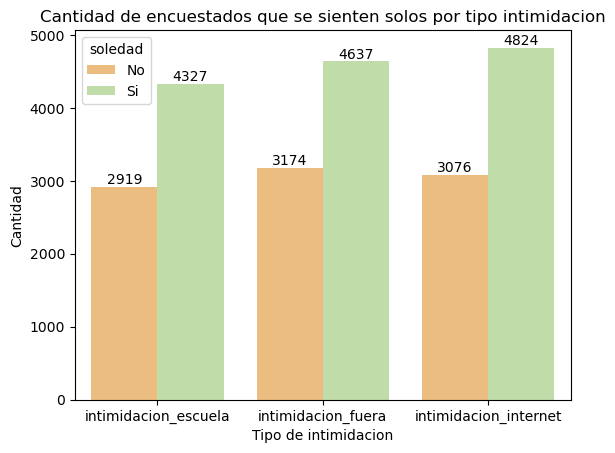

In [163]:
cross_intimidaciones = df[['intimidacion_escuela', 'intimidacion_fuera', 'intimidacion_internet','soledad']].melt(id_vars=['soledad']).groupby(['soledad','variable']).sum().reset_index()

fig = sns.barplot(data=cross_intimidaciones, y='value', x='variable', hue='soledad', palette="Spectral")
fig.set_xlabel('Tipo de intimidacion')
fig.set_ylabel('Cantidad')
plt.title("Cantidad de encuestados que se sienten solos por tipo intimidacion")

for bars in fig.containers:
    fig.bar_label(bars)
    
cross_intimidaciones

> Aquí vemos que en todos los casos de intimidación son más los que se sienten solos que los que no.

> Para el caso de interés de **intimidación escolar** el **60%** de las víctimas se siente solo. 

,masculino,femenino
participar_pelea,,
0,10844,15975
1,2538,1622
2,1528,696
4,427,182
6,228,69
8,105,38
10,79,24
12,357,166


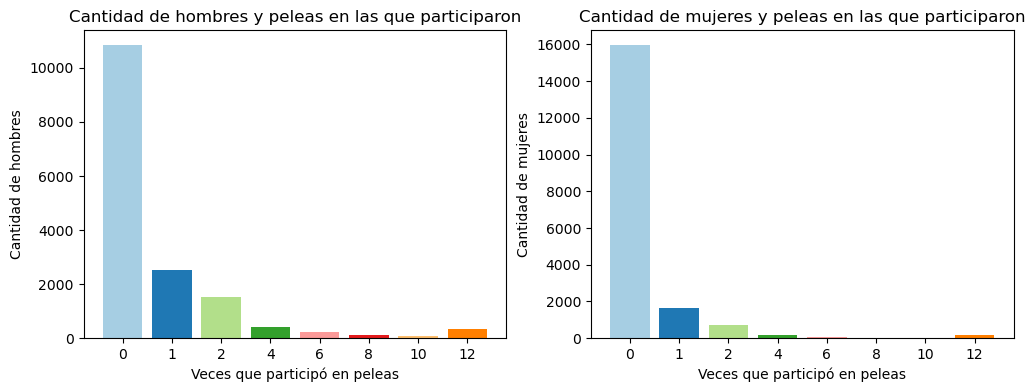

In [166]:
# Algunos otros datos interesantes analizados : 
# Cantidad de individuos  que participaron en peleas por sexo
fig, axes = plt.subplots(1,2, figsize=(12, 4))

# Df con solo los  masculinos
df_masculino = df[df['sexo_Masculino'] == True]

# Total de hombres  que hayan o no participado en peleas 
conteo_peleas_masculino = df_masculino['participar_pelea'].value_counts().sort_index()

# Gráfico de barras para hombres
axes[0].bar(conteo_peleas_masculino.index.astype(str), conteo_peleas_masculino.values, color=plt.color_sequences['Paired'])

# Cantidad de mujeres que fueron lesionadas
df_femenino = df[df['sexo_Femenino'] == True]

# Contar la cantidad de mujeres en cada categoría de lesiones
conteo_peleas_femenino = df_femenino['participar_pelea'].value_counts().sort_index()

# Gráfico de barras para mujeres
axes[1].bar(conteo_peleas_femenino.index.astype(str), conteo_peleas_femenino.values, color=plt.color_sequences['Paired'])

# Añadimos los  títulos  y etiquetas
axes[1].set_title('Cantidad de mujeres y peleas en las que participaron')
axes[1].set_xlabel('Veces que participó en peleas')
axes[1].set_ylabel('Cantidad de mujeres')
axes[0].set_title('Cantidad de hombres y peleas en las que participaron')
axes[0].set_xlabel('Veces que participó en peleas')
axes[0].set_ylabel('Cantidad de hombres')

peleas = pd.DataFrame()
peleas['masculino'] = conteo_peleas_masculino
peleas['femenino'] = conteo_peleas_femenino

peleas

> En los dos casos no participaron en peleas o participaron en pocas, aunque es llamativo como suben nuevamente los casos en los que participaron en 12 o más peleas. Se refleja también que en proporción los hombres participaron en más peleas que las mujeres.

,masculino,femenino
cantidad_lesiones,,
0,9997,13575
1,3502,3056
2,1767,1439
4,460,356
6,128,125
8,88,67
10,33,36
12,131,118


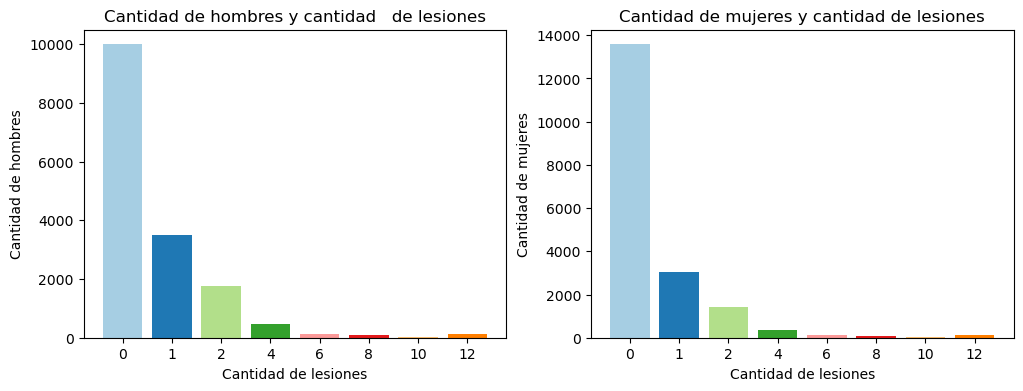

In [170]:
# Cantidad de individuos que fueron lesionadas por sexo
fig, axes = plt.subplots(1,2, figsize=(12, 4))

# Total de hombres que fueron lesionados
conteo_lesiones_masculino = df_masculino['cantidad_lesiones'].value_counts().sort_index()

# Gráfico de barras para hombres
axes[0].bar(conteo_lesiones_masculino.index.astype(str), conteo_lesiones_masculino.values, color=plt.color_sequences['Paired'])

# Contar la cantidad de mujeres en cada categoría de lesiones
conteo_lesiones_femenino = df_femenino['cantidad_lesiones'].value_counts().sort_index()

# Gráfico de barras para mujeres
axes[1].bar(conteo_lesiones_femenino.index.astype(str), conteo_lesiones_femenino.values, color=plt.color_sequences['Paired'])

# Añadimos los  títulos  y etiquetas
axes[1].set_title('Cantidad de mujeres y cantidad de lesiones')
axes[1].set_xlabel('Cantidad de lesiones')
axes[1].set_ylabel('Cantidad de mujeres')
axes[0].set_title('Cantidad de hombres y cantidad   de lesiones')
axes[0].set_xlabel('Cantidad de lesiones')
axes[0].set_ylabel('Cantidad de hombres')

lesiones = pd.DataFrame()
lesiones['masculino'] = conteo_lesiones_masculino
lesiones['femenino'] = conteo_lesiones_femenino

lesiones

> Vemos una distribución muy similar entre lesiones que sufrió cada género. Son pocos los casos que reportan lesiones.

## CONCLUSIONES

La EMSE proporciona datos que pueden ser utilizados para diseñar políticas y estrategias de intervención, y es esencial destacar cómo estos datos pueden influir en la prevención y el manejo del bullying en el entorno escolar.

El análisis de los datos obtenidos de la Encuesta Mundial de Salud Escolar revela una preocupante prevalencia de bullying entre los estudiantes. De un total de 34.878 encuestados, un alarmante **65,82%** reportó haber sido **víctima de intimidación**, lo que subraya la magnitud del problema en niños escolarizados.

Es significativo observar que, dentro del grupo de víctimas de intimidación en el ámbito escolar, el **59.6%** son mujeres, lo que indica una mayor vulnerabilidad entre las estudiantes femeninas. 
En el contexto escolar, el **60%** de las víctimas se siente solo, un dato que resalta el impacto emocional del bullying. Este sentimiento de soledad se extiende a un 57.12% en el caso de los encuestados que han sufrido intimidación, en comparación con un 33.12% de aquellos que no han sido víctimas. Esto sugiere que el bullying no solo afecta la seguridad física de los estudiantes, sino que también tiene profundas repercusiones en su bienestar emocional.

La baja incidencia de peleas o lesiones entre los encuestados sugiere que el bullying puede manifestarse de formas más sutiles, como el acoso verbal o social, que no siempre resultan en daños físicos visibles, pero que pueden ser igualmente devastadores. Esto pone de relieve la necesidad de abordar el bullying desde una perspectiva integral, que incluya la promoción de un ambiente escolar seguro y el apoyo emocional para las víctimas.

Es crucial implementar programas de prevención y concientización en las escuelas que no solo aborden el bullying físico, sino que también reconozcan y traten el acoso psicológico y emocional. 

__En resumen, los datos de la Encuesta Mundial de Salud Escolar evidencian la urgencia de abordar el bullying en el ámbito escolar, no solo como un problema de convivencia, sino como una cuestión que afecta la salud emocional y social de los estudiantes.__